* В алгоритма два входных параметра min_samples и eps. Если в заданной окрестности eps есть минимальное необходимое количество объектов min_samples, то данная окрестность будет считаться кластером.
* Если в заданной области нет необходимого количества объектов, то инициирующая эту область точка считается выбросом
Кластеры, найденные DBSCAN могут иметь любую форму, в отличии от алгоритма k-means (которые предполагают только выпуклую форму)


In [3]:
import tensorflow as tf 
hello = tf.constant("hello TensorFlow!")
sess=tf.Session() 
print( sess.run(hello))

b'hello TensorFlow!'


Estimated number of clusters: 2
Estimated number of noise points: 1
Homogeneity: 1.000
Completeness: 1.000
V-measure: 1.000
Adjusted Rand Index: 1.000
Adjusted Mutual Information: 1.000
Silhouette Coefficient: 0.723


C:\Programs\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


Text(0.5, 1.0, 'Estimated number of clusters: 2')

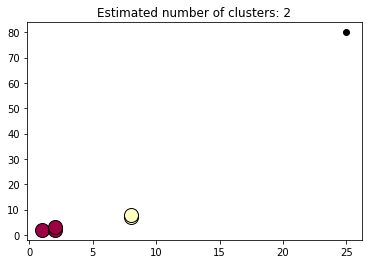

In [41]:
from sklearn.cluster import DBSCAN
import numpy as np
X1=X.copy()
###SOME DATA
X1 = np.array([[1, 2], [2, 2], [2, 3],
               [8, 7], [8, 8], [25, 80]])

####
from sklearn.datasets import make_blobs #Generate isotropic Gaussian blobs for clustering.
centers = [[1, 1], [-1, -1], [1, -1]]  
X1, labels_true = make_blobs(n_samples=750, centers=centers, cluster_std=0.4,   #ХЗ
                            random_state=0)

#######   ЦЕНТРИрование или нормализация
from sklearn.preprocessing import StandardScaler
X1 = StandardScaler().fit_transform(X)  # при центрировании расстояние меняется и дифференциация классов тоже
#####   Многомерная кластеризация
from sklearn.decomposition import PCA
pca = PCA(n_components=2).fit(X)
X1 = pca.transform(X)
######

clustering = DBSCAN(eps=3, min_samples=2, #n_jobs=-1 #- используемы процессоры #defaul=None Один
                   ).fit(X)
db=clustering
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels=clustering.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
#n_noise_ = list(labels).count(-1)


#####  metrics
from sklearn import metrics
labels_true=labels
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))

######ОТрисовывае
import matplotlib.pyplot as plt
# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)  #отдельная маска под каждый класс

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]   
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)
#core_samples_mask - маска не шума, с отрицание ~будет шум
#class_member_mask- маска для опред класса
#а можно брать маску по всем классам (labels == k)
plt.title('Estimated number of clusters: %d' % n_clusters_)

In [ ]:
#3D Отрисовка   #PCA(n_components=3).fit(X)
import matplotlib.pyplot as plt

from mpl_toolkits import mplot3d 
ax = plt.axes(projection="3d")    

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)  #отдельная маска под каждый класс

    xy = X1[class_member_mask & core_samples_mask]
    ax.plot3D(xy[:, 0], xy[:, 1],xy[:, 2], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X1[class_member_mask & ~core_samples_mask]   
    ax.plot3D(xy[:, 0], xy[:, 1],xy[:, 2], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)
#core_samples_mask - маска не шума, с отрицание ~будет шум
#class_member_mask- маска для опред класса
#а можно брать маску по всем классам (labels == k)
plt.title('Estimated number of clusters: %d' % n_clusters_)

Text(0.5, 1.0, 'Estimated number of clusters: 2')

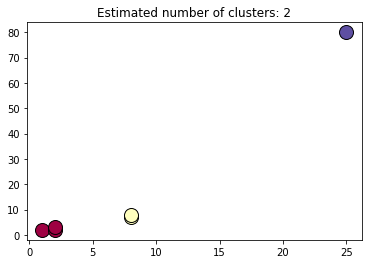

In [43]:
#fast start на минималках
clustering = DBSCAN(eps=3, min_samples=2).fit(X)
unique_labels=set(clustering.labels_)
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    xy = X [(labels == k)]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)
plt.title('Estimated number of clusters: %d' % n_clusters_)

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0
  0  0  1  1  1  1  1  1  1 -1  1  1 -1  1  1  1  1  1  1  1 -1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1 -1  1  1
  1  1 -1  1  1  1  1  1  1 -1 -1  1 -1 -1  1  1  1  1  1  1  1 -1 -1  1
  1  1 -1  1  1  1  1  1  1  1  1 -1  1  1 -1 -1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1]


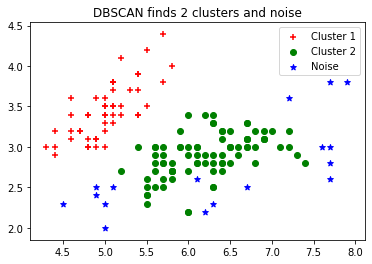

In [11]:
#Рчное выставление цветов  хлам

from sklearn.datasets import load_iris
from sklearn.cluster import DBSCAN
 
iris = load_iris()
dbscan = DBSCAN(eps=0.5, min_samples=5)
 
dbscan.fit(iris.data)
 
# Готово! Распечатаем метки принадлежности к кластерам
print(dbscan.labels_)

from sklearn.decomposition import PCA
import matplotlib.pyplot as pl
 
#pca = PCA(n_components=2).fit(iris.data)
#pca_2d = pca.transform(iris.data)
pca_2d=iris.data
for i in range(0, pca_2d.shape[0]):
    if dbscan.labels_[i] == 0:
        c1 = pl.scatter(pca_2d[i, 0], pca_2d[i, 1], c='r', marker='+')
    elif dbscan.labels_[i] == 1:
        c2 = pl.scatter(pca_2d[i, 0], pca_2d[i, 1], c='g', marker='o')
    elif dbscan.labels_[i] == -1:
        c3 = pl.scatter(pca_2d[i, 0], pca_2d[i, 1], c='b', marker='*')
 
pl.legend([c1, c2, c3], ['Cluster 1', 'Cluster 2', 'Noise'])
pl.title('DBSCAN finds 2 clusters and noise')
pl.show()